# PROBLEM 3: Artesian-water table conversion


### INTRODUCTION
When a confined aquifer is heavily stressed, its potentiometric surface may be drawn down sufficiently such that the aquifer begins to dewater. or behave as a water-table aquifer. This conversion takes place when the potentiometric surface falls below the top of the aquifer. The primary change that takes place in a situation such as this is with the storage coefficient (s); under confined conditions water is derived from pressure changes and S is fairly small, while under water-table conditions water is derived from dewatering pore spaces and S is usually fairly large. A secondary change is that if drawdown is sufficient to cause changes in saturated thickness, the transmissivity of the aquifer will be reduced. MODFLOW has the capability to model both these effects. This problem demonstrates the physical process of the conversion, how it is implemented in MODFLOW simulations, and compares the numerical results to an analytical solution.


### PROBLEM STATEMENT AND DATA
The problem is essentially the same as the example presented by Moench and Prickett (1972) who derived an analytical solution to the artesian-water-table conversion problem. The assumptions inherent in the Theis solution are also a part of this solution. Of particular interest to this problem, the thickness of the aquifer is assumed to be such that the dewatering does not significantly reduce the aquifer transmissivity, all flow lines in the water table region are assumed horizontal, and water is released instantaneously from storage. The model domain is assumed to be effectively infinite; the grid is therefore extended to where the effects of the stress are negligible.
A fully penetrating well located at the center of the aquifer pumps at a constant rate. The potentiometric surface of the aquifer is monitored with time at an observation well 1000 ft from the pumping well. Specific details on the problem are given in Table 3.1 and are from Moench and Prickett (1972).


### Part a)
Represent the entire aquifer domain by using the grid spacing shown in Table 3.2. Place the well at node 1,1, and use one-fourth of the well discharge given in Table 3.1, because only 1/4 of the aquifer domain is modeled. Place the aquifer top at -1 ft. Use layer type 2 (LAYCON) so that the conversion only involves a change in storage coefficient. Run the model and note drawdown with time at a point 1000 ft from the pumping well.

### Table 3.2 Grid spacing (ft) used in Problem 3

| Row number i (=column number, j) | DELC(i) (=DELR(j)) |
|----------------------------------|--------------------|
| 1                                | 10                 |
| 2                                | 15                 |
| 3                                | 20                 |
| 4                                | 30                 |
| 5                                | 50                 |
| 6                                | 70                 |
| 7                                | 100                |
| 8                                | 150                |
| 9                                | 200                |
| 10                               | 220                |
| 11                               | 280                |
| 12                               | 300                |
| 13                               | 400                |
| 14                               | 600                |
| 15                               | 800                |
| 16                               | 1000               |
| 17                               | 1500               |
| 18                               | 2000               |
| 19                               | 3000               |
| 20                               | 4000               |
| 21                               | 6000               |
| 22                               | 8000               |
| 23                               | 10000              |
| 24                               | 15000              |
| 25                               | 20000              |
| 26                               | 30000              |

In [128]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy
import csv

print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
numpy version: 1.11.3
matplotlib version: 2.0.0
flopy version: 3.2.6


In [129]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/table3.2.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist = line.strip().split(',') 
    
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\EPA-MF-Problems\Notebooks
10.0
15.0
20.0
30.0
50.0
70.0
100.0
150.0
200.0
220.0
280.0
300.0
400.0
600.0
800.0
1000.0
1500.0
2000.0
3000.0
4000.0
6000.0
8000.0
10000.0
15000.0
20000.0
30000.0
[10.0, 15.0, 20.0, 30.0, 50.0, 70.0, 100.0, 150.0, 200.0, 220.0, 280.0, 300.0, 400.0, 600.0, 800.0, 1000.0, 1500.0, 2000.0, 3000.0, 4000.0, 6000.0, 8000.0, 10000.0, 15000.0, 20000.0, 30000.0]


[  1.00000000e+01   1.50000000e+01   2.00000000e+01   3.00000000e+01
   5.00000000e+01   7.00000000e+01   1.00000000e+02   1.50000000e+02
   2.00000000e+02   2.20000000e+02   2.80000000e+02   3.00000000e+02
   4.00000000e+02   6.00000000e+02   8.00000000e+02   1.00000000e+03
   1.50000000e+03   2.00000000e+03   3.00000000e+03   4.00000000e+03
   6.00000000e+03   8.00000000e+03   1.00000000e+04   1.50000000e+04
   2.00000000e+04   3.00000000e+04]
103745.0


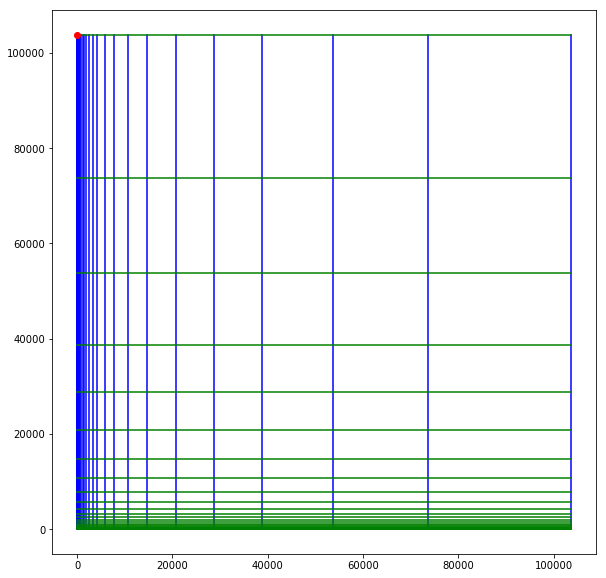

In [130]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
delr_array = np.array(delr) #changes delr values from float to array
print (delr_array) #prints those values
print (delr_array.sum()) #prints the sum of those values
ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0
x = 0
y = 0
xmean = delr_array.sum() * .5
ymean = delr_array.sum() * .5

plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line. Must be outside of the loop

for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x, x], [ymax, ymin], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line. Must be outside of the loop

for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')


def plot_well(xmin, ymax, sym):
    plt.plot(xmin, ymax, sym)
plot_well(xmin, ymax, sym='ro')

### Table 3.1. Parameters used in Problem 3

| Variable | Value  |
|----------------------------|-----------------|
| Initial head                   | 0.0 ft           |
| Transmissivity                 | 2673.8 ft^2/d    |
| Storage coefficient (confined) | 0.0001           |
| Specific yield (unconfined)    | 0.1              |
| Pumping rate                   | 33636 ft^3/d     |
| Stress period length           | 100 days         |
| Number of time steps           | 25               |
| Time step expansion factor     | 1.44             |
| SIP iteration parameters       | 5                |
| Closure criterion              | 0.001            |
| Maximum number iterations      | 50               |

In [131]:
#Store the values of each parameter into separate variables
inh = 0.0 #initial head
trans = 2673.8 #transmissivity (is equal to hk*(top-botm))
ss = 0.0001 #storage coefficient
sy = 0.1 #specific yield
pr = 33636 #pumping rate
perlen = 100 #final time (period length)
nstp = 25 #number of time steps
tsmult = 1.44 #time step expansion factor (time step multiplier)
sip_it_par = 5 #SIP iteration parameters
hclose = 0.001 #closure criterion (the head change criterion for convergence)
mxiter = 50 #maximum number of iterations

#print values to make sure they are all stored properly
#put in quotes to make a string, .format takes whatever is in the () 
#and changes it to a float, it is then stored in the {}

print('initial head: {}'.format(inh))
print('transmissivity: {} ft^2/d'.format(trans))
print('storage coefficient (confined): {}'.format(ss))
print('specific yield (unconfined): {}'.format(sy))
print('pumping rate: {} ft^3/d'.format(pr))
print('final time: {} s'.format(perlen))
print('number of time steps: {}'.format(nstp))
print('time step expansion factor: {}'.format(tsmult))
print('SIP iteration parameters: {}'.format(sip_it_par))
print('closure criterion: {}'.format(hclose))
print('maximum number of iterations: {}'.format(mxiter))

initial head: 0.0
transmissivity: 2673.8 ft^2/d
storage coefficient (confined): 0.0001
specific yield (unconfined): 0.1
pumping rate: 33636 ft^3/d
final time: 100 s
number of time steps: 25
time step expansion factor: 1.44
SIP iteration parameters: 5
closure criterion: 0.001
maximum number of iterations: 50


In [144]:
#Flopy objects
modelname = 'p3_pa' #short for problem 3 part a
exe_name = '../MF2005.1_12/bin/mf2005.exe'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = modelname)

In [164]:
#call in the discretization package
delr = delr
delc = delr #set delr values equal to delc
top = -1 #an array of the top elevation of layer 1
#botm = 0 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
nlay = 1
nrow = 26
ncol = 26
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfdis.ModflowDis'> <class 'flopy.modflow.mfdis.ModflowDis'>
replacing existing Package...


In [165]:
#call in the basic package
ibound = np.ones((nlay, nrow, ncol))
strt = inh
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfbas.ModflowBas'> <class 'flopy.modflow.mfbas.ModflowBas'>
replacing existing Package...


In [166]:
#call in the well package (WEL)
quarter_pr = pr * (1/4)
print(quarter_pr)
# Remember to use zero-based layer, row, column indices!
wel_sp1 = [[0, 0, 0, -quarter_pr]]
stress_period_data = {0: wel_sp1}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)
print(wel_sp1)

8409.0
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfwel.ModflowWel'> <class 'flopy.modflow.mfwel.ModflowWel'>
replacing existing Package...
[[0, 0, 0, -8409.0]]


In [167]:
#call in the preconditioned conjugate-gradient package (PCG) 
pcg = flopy.modflow.ModflowPcg(mf, mxiter=mxiter, hclose=hclose)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfpcg.ModflowPcg'> <class 'flopy.modflow.mfpcg.ModflowPcg'>
replacing existing Package...


In [168]:
#call in the layer-propery flow (LPF)
hk = trans
laytyp = 2
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, ss=ss, sy=sy, laytyp=laytyp)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mflpf.ModflowLpf'> <class 'flopy.modflow.mflpf.ModflowLpf'>
replacing existing Package...


In [169]:
#call in the output control package (OC)
oc = flopy.modflow.ModflowOc(mf)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfoc.ModflowOc'> <class 'flopy.modflow.mfoc.ModflowOc'>
replacing existing Package...


In [170]:
# Write the MODFLOW model input files
mf.write_input()

In [171]:
# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p3_pa.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/06/14 12:59:34

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.


In [172]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(modelname, 'p3_pa.hds') #"os.path.join" joins together the modelname and the .hds file and stores it in fname
headobj = bf.HeadFile(fname) #create headobj and put values from fname (aka 'p1_pa.hds') inside it
times = headobj.get_times() #assign the headobj values to the variable "times"
print(times) #prints the time at each stress period

#print hydraulic head at node (1, 4) for part a (Table 14.2)
ts = headobj.get_ts([[0, 0, 8]])
print(ts)

IndexError: index 0 is out of bounds for axis 0 with size 0

(0, 99.999985)

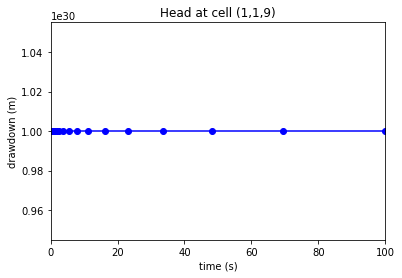

In [163]:
# Plot the drawdown versus time
idx = (0, 0, 8)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (s)')
plt.ylabel('drawdown (m)')
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-')
plt.xlim(0, ts[:, 0].max())
#plt.legend(['coarse quadrant'], loc='best')

### MODEL OUTPUT
Drawdown versus time is tabulated in Table 3.3 and plotted in Figure 3.1 for each of the four cases. The results of parts a and b can also be compared to Moench and Prickett (1972) which is reproduced on the table.


### Table 3.3 Drawdown versus time for each model configuration

| Time step number | Time (days) | Analytical (Aquifer top at -1) | MODFLOW (Aquifer top at -1) | Analytical (Aquifer top at -2) | MODFLOW (Aquifer top at -2) | Confined (S=0.0001) | Unconfined(S=0.1) |
|------------------|-------------|--------------------------------|-----------------------------|--------------------------------|-----------------------------|---------------------|-------------------|
| 1                | 0.0072      | 0.02                           | 0.03                        | 0.04                           | 0.06                        | 0.16                | 0                 |
| 2                | 0.0173      | 0.09                           | 0.09                        | 0.17                           | 0.16                        | 0.47                | 0                 |
| 3                | 0.0317      | 0.16                           | 0.16                        | 0.3                            | 0.28                        | 0.84                | 0                 |
| 4                | 0.052       | 0.23                           | 0.22                        | 0.42                           | 0.41                        | 1.22                | 0                 |
| 5                | 0.0806      | 0.29                           | 0.29                        | 0.55                           | 0.53                        | 1.61                | 0                 |
| 6                | 0.1212      | 0.36                           | 0.36                        | 0.66                           | 0.65                        | 1.98                | 0                 |
| 7                | 0.1785      | 0.42                           | 0.42                        | 0.78                           | 0.78                        | 2.36                | 0                 |
| 8                | 0.2596      | 0.48                           | 0.49                        | 0.9                            | 0.89                        | 2.72                | 0                 |
| 9                | 0.3743      | 0.55                           | 0.55                        | 1.01                           | 1.01                        | 3.08                | 0                 |
| 10               | 0.5364      | 0.61                           | 0.62                        | 1.13                           | 1.13                        | 3.43                | 0                 |
| 11               | 0.7657      | 0.67                           | 0.68                        | 1.24                           | 1.24                        | 3.78                | 0                 |
| 12               | 1.09        | 0.73                           | 0.74                        | 1.35                           | 1.36                        | 4.14                | 0                 |
| 13               | 1.548       | 0.79                           | 0.8                         | 1.46                           | 1.47                        | 4.5                 | 0                 |
| 14               | 2.196       | 0.85                           | 0.86                        | 1.58                           | 1.6                         | 4.85                | 0.01              |
| 15               | 3.113       | 0.91                           | 0.93                        | 1.69                           | 1.7                         | 5.2                 | 0.02              |
| 16               | 4.409       |                                | 1                           | 1.8                            | 1.83                        | 5.55                | 0.05              |
| 17               | 6.241       | 1.03                           | 1.05                        |                                | 1.93                        | 5.9                 | 0.11              |
| 18               | 8.832       | 1.13                           | 0.14                        | 2.02                           | 2.05                        | 6.26                | 0.2               |
| 19               | 12.5        | 1.27                           | 1.27                        | 2.17                           | 2.18                        | 6.61                | 0.33              |
| 20               | 17.68       | 1.46                           | 1.44                        | 2.35                           | 2.35                        | 6.96                | 0.5               |
| 21               | 25          | 1.68                           | 1.65                        | 2.57                           | 2.57                        | 7.37                | 0.71              |
| 22               | 35.36       | 1.93                           | 1.9                         | 2.83                           | 2.83                        | 7.72                | 0.96              |
| 23               | 50.01       | 2.21                           | 2.17                        | 3.1                            | 3.1                         | 8.07                | 1.23              |
| 24               | 70.72       | 2.51                           | 2.46                        | 3.4                            | 3.4                         | 8.42                | 1.52              |
| 25               | 100         | 2.82                           | 2.77                        | 3.71                           | 3.71                        | 8.79                | 1.83              |